In [5]:
%pwd


'/Users/oferbaharav/Lambda DSPT3/DS-Unit-4/DS-Unit-4-Sprint-1-NLP'

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [7]:
import re

In [8]:
dates = []
for text in shops['full_review_text']:
    dates.append(re.findall(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b', text)[0])
shops['review_date'] = dates

In [9]:
content = []
for text in shops['full_review_text']:
    content.append(re.sub(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b', '', text))
shops['review_content'] = content

In [10]:
ratings = []
for text in shops['star_rating']:
    ratings.append(re.findall(r'\b[0-9]+\.[0-9]+\b', text)[0])
shops['rating'] = ratings

In [11]:
shops.max_columns = None
shops.head(5)

,coffee_shop_name,full_review_text,star_rating,review_date,review_content,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016,1 check-in Love love loved the atmosphere! E...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,12/2/2016,"Listed in Date Night: Austin, Ambiance in Au...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,11/30/2016,1 check-in Listed in Brunch Spots I loved th...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,11/25/2016,Very cool decor! Good drinks Nice seating H...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,12/3/2016,1 check-in They are located within the North...,4.0


In [13]:
shops.drop(['full_review_text', 'star_rating'], axis = 1)

,coffee_shop_name,review_date,review_content,rating
0,The Factory - Cafe With a Soul,11/25/2016,1 check-in Love love loved the atmosphere! E...,5.0
1,The Factory - Cafe With a Soul,12/2/2016,"Listed in Date Night: Austin, Ambiance in Au...",4.0
2,The Factory - Cafe With a Soul,11/30/2016,1 check-in Listed in Brunch Spots I loved th...,4.0
3,The Factory - Cafe With a Soul,11/25/2016,Very cool decor! Good drinks Nice seating H...,2.0
4,The Factory - Cafe With a Soul,12/3/2016,1 check-in They are located within the North...,4.0
...,...,...,...,...
7611,The Steeping Room,2/19/2015,I actually step into this restaurant by chan...,4.0
7612,The Steeping Room,1/21/2016,"Ok, The Steeping Room IS awesome. How do the...",5.0
7613,The Steeping Room,4/30/2015,"Loved coming here for tea, and the atmospher...",4.0
7614,The Steeping Room,8/2/2015,The food is just average. The booths didn't ...,3.0


In [14]:
shops['rating'].value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: rating, dtype: int64

In [15]:
shops.review_date.isna().sum()

0

In [16]:
sample = "Friends, Romans, countrymen, lend me your ears;"
dir(sample)
sample.replace(',','').split()

['Friends', 'Romans', 'countrymen', 'lend', 'me', 'your', 'ears;']

In [17]:
shops['review_content'].value_counts()

  1 check-in Super cute place for lounging and chatting up with a friend. The chicken and waffle was delicious. Chicken was cooked to perfection! Super moist chicken with fluffy waffle...more of a snack than a meal, so don't go here expecting to be filled with a meal.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [18]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [19]:
tokenize(sample)

['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears']

In [20]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")


In [21]:
shops['tokens'] = shops['review_content'].apply(tokenize)

In [22]:
shops['tokens'].head()

0    [1, checkin, love, love, loved, the, atmospher...
1    [listed, in, date, night, austin, ambiance, in...
2    [1, checkin, listed, in, brunch, spots, i, lov...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [1, checkin, they, are, located, within, the, ...
Name: tokens, dtype: object

In [23]:
shops['rating'].value_counts(dropna=False)

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: rating, dtype: int64

In [24]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [25]:
shops.shape

(7616, 7)

In [26]:
def count(docs):

    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [27]:
wc = count(shops['tokens'])

In [28]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
57,the,6847,34809,1.0,0.044978,0.044978,0.899028
71,and,6864,26650,2.0,0.034436,0.079414,0.901261
24,a,6246,22755,3.0,0.029403,0.108816,0.820116
34,i,5528,20237,4.0,0.026149,0.134965,0.725840
13,to,5653,17164,5.0,0.022178,0.157144,0.742253


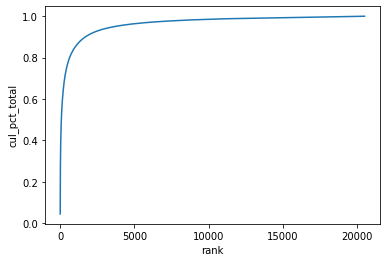

In [29]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [30]:
wc[wc['rank'] <= 200000]['cul_pct_total'].max()

1.0000000000003988

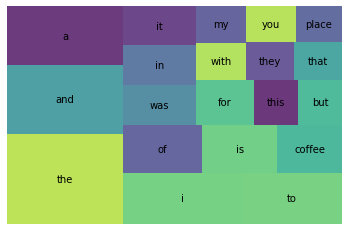

In [31]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [32]:
import spacy
from spacy.tokenizer import Tokenizer


# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [33]:
# Print out list of tokens
[token.text for token in tokenizer(sample)]

['Friends,', 'Romans,', 'countrymen,', 'lend', 'me', 'your', 'ears;']

In [34]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['review_content'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [35]:
shops['tokens'].head()

0    [  , 1, check-in, Love, love, loved, the, atmo...
1    [  , Listed, in, Date, Night:, Austin,, Ambian...
2    [  , 1, check-in, Listed, in, Brunch, Spots, I...
3    [  , Very, cool, decor!, Good, drinks, Nice, s...
4    [  , 1, check-in, They, are, located, within, ...
Name: tokens, dtype: object

In [36]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['review_content'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.is_space == False) & (token.is_alpha == True):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [37]:
shops.tokens.head()

0    [love, love, loved, corner, coffee, shop, orde...
1    [listed, date, ambiance, austin, love, definit...
2    [listed, brunch, spots, loved, eclectic, homey...
3    [cool, good, drinks, nice, seating, extra, oun...
4    [located, northcross, mall, shopping, center, ...
Name: tokens, dtype: object

In [38]:
shops['good'] = shops['rating'] >= '4.0'

In [39]:
shops.head(5)

,coffee_shop_name,full_review_text,star_rating,review_date,review_content,rating,tokens,good
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016,1 check-in Love love loved the atmosphere! E...,5.0,"[love, love, loved, corner, coffee, shop, orde...",True
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,12/2/2016,"Listed in Date Night: Austin, Ambiance in Au...",4.0,"[listed, date, ambiance, austin, love, definit...",True
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,11/30/2016,1 check-in Listed in Brunch Spots I loved th...,4.0,"[listed, brunch, spots, loved, eclectic, homey...",True
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,11/25/2016,Very cool decor! Good drinks Nice seating H...,2.0,"[cool, good, drinks, nice, seating, extra, oun...",False
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,12/3/2016,1 check-in They are located within the North...,4.0,"[located, northcross, mall, shopping, center, ...",True


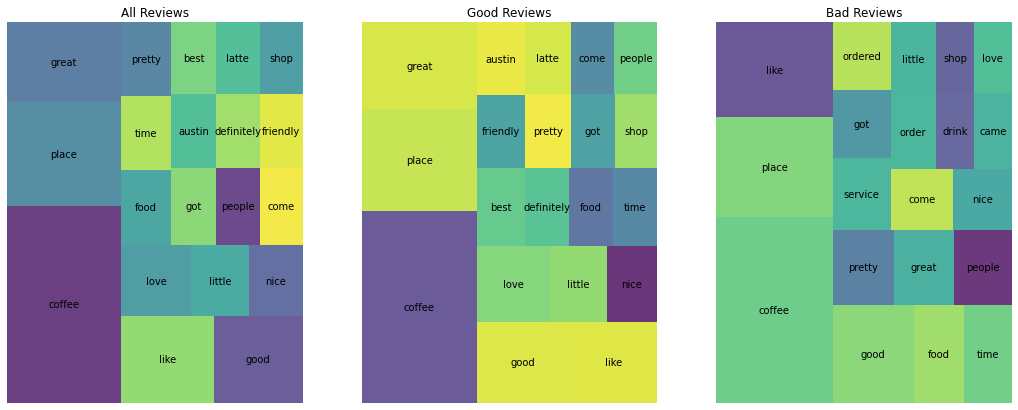

In [40]:
wc = count(shops['tokens'])
wc_good = count(shops[shops['good'] == True]['tokens'])
wc_bad = count(shops[shops['good'] == False]['tokens'])

# Get top 20 word occurences for each set of data
wc_top20 = wc[wc['rank'] <= 20]
wc_good_top20= wc_good[wc_good['rank'] <= 20]
wc_bad_top20 = wc_bad[wc_bad['rank'] <= 20]

fig, axes = plt.subplots(1, 3, figsize=(18, 7))

axes[0].set_title('All Reviews')
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Good Reviews')
squarify.plot(sizes=wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

axes[2].set_title('Bad Reviews')
squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')
plt.show()

In [41]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'place', 'great', 'people', 'food', 'love'])

In [42]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['review_content'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if  (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.is_space == False) & (token.is_alpha == True):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens



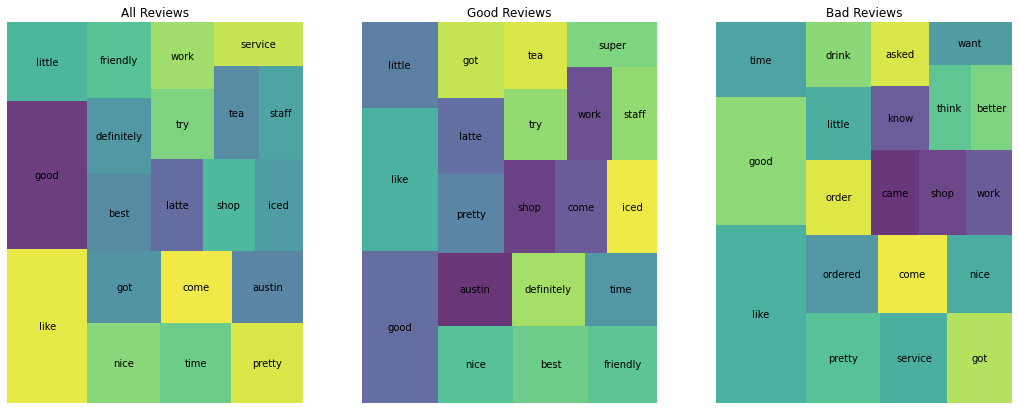

In [43]:
wc = count(shops['tokens'])
wc_good = count(shops[shops['good'] == True]['tokens'])
wc_bad = count(shops[shops['good'] == False]['tokens'])

# Get top 20 word occurences for each set of data
wc_top20 = wc[wc['rank'] <= 20]
wc_good_top20= wc_good[wc_good['rank'] <= 20]
wc_bad_top20 = wc_bad[wc_bad['rank'] <= 20]

fig, axes = plt.subplots(1, 3, figsize=(18, 7))

axes[0].set_title('All Reviews')
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Good Reviews')
squarify.plot(sizes=wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

axes[2].set_title('Bad Reviews')
squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')
plt.show()

In [44]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()



In [45]:
# Leverage tqdm for progress_apply
from tqdm import tqdm
tqdm.pandas()

/Users/oferbaharav/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [46]:
# Put in a new column `stems`
shops['stems'] = shops.tokens.progress_apply(lambda x: [ps.stem(word) for word in x])
shops.head(1)

100%|██████████| 7616/7616 [00:08<00:00, 854.24it/s] 


,coffee_shop_name,full_review_text,star_rating,review_date,review_content,rating,tokens,good,stems
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016,1 check-in Love love loved the atmosphere! E...,5.0,"[loved, corner, shop, ordered, matcha, muy, or...",True,"[love, corner, shop, order, matcha, muy, order..."


In [47]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [48]:
shops['lemmas'] = shops['review_content'].progress_apply(get_lemmas)

100%|██████████| 7616/7616 [04:33<00:00, 27.83it/s]


In [57]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['lemmas'].str.join(' '), batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if  (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.is_space == False) & (token.is_alpha == True):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['lemmas'] = tokens

In [60]:
shops.lemmas.head()

0    [check, atmosphere, corner, shop, style, swing...
1    [list, date, night, austin, ambiance, austin, ...
2    [check, list, brunch, spots, eclectic, homey, ...
3    [cool, decor, good, drink, nice, seating, over...
4    [check, locate, northcross, mall, shopping, ce...
Name: lemmas, dtype: object

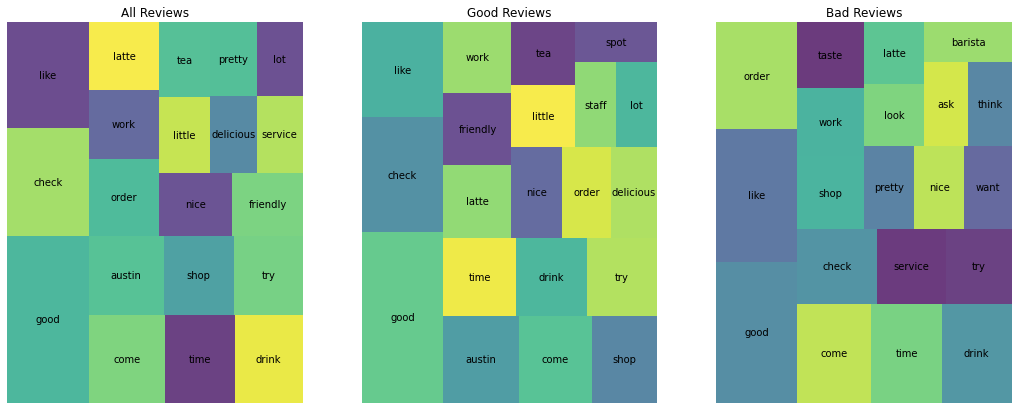

In [75]:
wc = count(shops['lemmas'])
wc_good = count(shops[shops['good'] == True]['lemmas'])
wc_bad = count(shops[shops['good'] == False]['lemmas'])

# Get top 20 word occurences for each set of data
wc_top20 = wc[wc['rank'] <= 20]
wc_good_top20= wc_good[wc_good['rank'] <= 20]
wc_bad_top20 = wc_bad[wc_bad['rank'] <= 20]

fig, axes = plt.subplots(1, 3, figsize=(18, 7))

axes[0].set_title('All Reviews')
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Good Reviews')
squarify.plot(sizes=wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

axes[2].set_title('Bad Reviews')
squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')
plt.show()

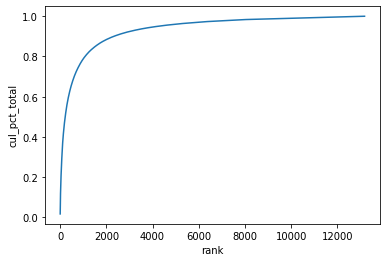

In [64]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [68]:
wc.head(100)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
150,good,3582,5366,1.0,0.017087,0.017087,0.470326
7,check,3174,3468,2.0,0.011043,0.028131,0.416754
142,like,2273,3379,3.0,0.010760,0.038891,0.298451
357,come,1932,2638,4.0,0.008400,0.047291,0.253676
433,time,1769,2395,5.0,0.007627,0.054917,0.232274
...,...,...,...,...,...,...,...
104,brew,464,618,96.0,0.001968,0.349152,0.060924
480,option,543,612,97.0,0.001949,0.351101,0.071297
823,customer,462,605,98.0,0.001927,0.353028,0.060662
1120,local,517,595,99.0,0.001895,0.354922,0.067883


In [69]:
wc['appears_in_pct'].describe()

count    13180.000000
mean         0.002686
std          0.012798
min          0.000131
25%          0.000131
50%          0.000263
75%          0.000919
max          0.470326
Name: appears_in_pct, dtype: float64

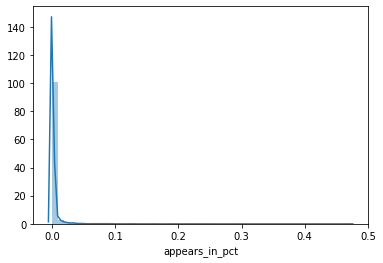

In [70]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_pct']);

(13180, 7)
(285, 7)


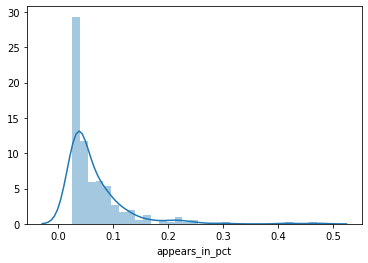

In [84]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

print(wc.shape)
wc25 = wc[wc['appears_in_pct'] >= 0.025]
print(wc25.shape)

sns.distplot(wc25['appears_in_pct']);

In [80]:
wc25.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
150,good,3582,5366,1.0,0.017087,0.017087,0.470326
7,check,3174,3468,2.0,0.011043,0.028131,0.416754
142,like,2273,3379,3.0,0.010760,0.038891,0.298451
357,come,1932,2638,4.0,0.008400,0.047291,0.253676
433,time,1769,2395,5.0,0.007627,0.054917,0.232274


In [49]:
# How do we want to analyze these coffee shop tokens?
# Overall Word / Token Count
# View Counts by Rating
# Hint: a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5.

# Can visualize the words with the greatest difference in counts between 'good' & 'bad'?
# Couple Notes:

# Rel. freq. instead of absolute counts b/c of different numbers of reviews
# Only look at the top 5-10 words with the greatest differences

# Stretch Goals
# Analyze another corpus of documents - such as Indeed.com job listings ;).
# Play with the Spacy API to
# Extract Named Entities
# Extracting 'noun chunks'
# Attempt Document Classification with just Spacy
# Note: This course will be of interesting in helping you with these stretch goals.
# Try to build a plotly dash app with your text data